# Researching apartment ads

# Table of Contents 

* [Introduction](#num1)
* [Data description](#num2)
* [1. Loading and merging data ](#num3)
* [2. Data preprocessing](#num4)
* [3. Exploratory data analysis ](#num5)
* [4. A study of films that have received state support ](#num6)
* [5. General conclusion](#num7)

<a id="num1"></a>
## Introduction

**The task** is to preprocess the data and explore it to find interesting features and dependencies that exist in the real estate market.
 
**It is necessary to:**
    
1. Study the general information;
2. Pre-process the data;
3. Add new columns with new parameters;
4. Conduct exploratory analysis of the data with the construction of various graphs;

<a id="num2"></a>
## Data description

We have at our disposal data from the Yandex.Real Estate service - an archive of advertisements for apartments for sale in St. Petersburg and neighboring settlements for several years. 

For each apartment for sale, two types of data are available. The first is entered by the user, the second is obtained automatically on the basis of map data. For example, the distance to the center, airport, nearest park and water body.

* The `real_estate_data.csv` dataset consists of the following columns:

`airports_nearest` - distance to the nearest airport in meters (m)

`balcony` - number of balconies

`ceiling_height` - ceiling height (m)

`cityCenters_nearest` - distance to the city center (m)

`days_exposition` - how many days the ad was placed (from publication to removal)

`first_day_exposition` - date of publication

`floor` - floor

`floors_total` - total number of floors in the house

`is_apartment` - apartment (Boolean type)

`kitchen_area` - kitchen area in square meters (m²)

`last_price` - price at the moment of withdrawal from publication

`living_area` - living area in square meters (m²)

`locality_name` - name of the locality

`open_plan` - free layout (Boolean type)

`parks_around3000` - number of parks within 3 km radius

`parks_nearest` - distance to the nearest park (m)

`ponds_around3000` - number of water bodies within 3 km radius

`ponds_nearest` - distance to the nearest body of water (m)

`rooms` - number of rooms

`studio` - studio apartment (Boolean type)

`total_area` - total area of the apartment in square meters (m²)

`total_images` - number of photos of the apartment in the ad

<a id="num3"></a>
## 1. Loading data

In [1]:
# Import the required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

C:\Users\Shiro\AppData\Local\Temp\ipykernel_15188\3675109483.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Try to load data from the CSV file
try:
    # Read the CSV data file using pandas. We specify the separator as '\t' 
    # because our CSV data is tab separated.
    data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')

    # Print out the information of the DataFrame. This includes the count of non-null values for each column,
    # the DataFrame's size and the type of data in each column.
    print(data.info())
    
    # Display the first five rows of our DataFrame to get an overview of the data
    display(data.head())
    
# If the file does not exist, Python will raise a FileNotFoundError
except FileNotFoundError:
    # Print an error message if the CSV data file was not found.
    print("File not found!")

# If any other error occurred, Python will raise a general Exception error.
except Exception as e:
    # Print the error message that explains what went wrong when trying to execute the code inside the `try` block
    print(f"An error occurred: {str(e)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


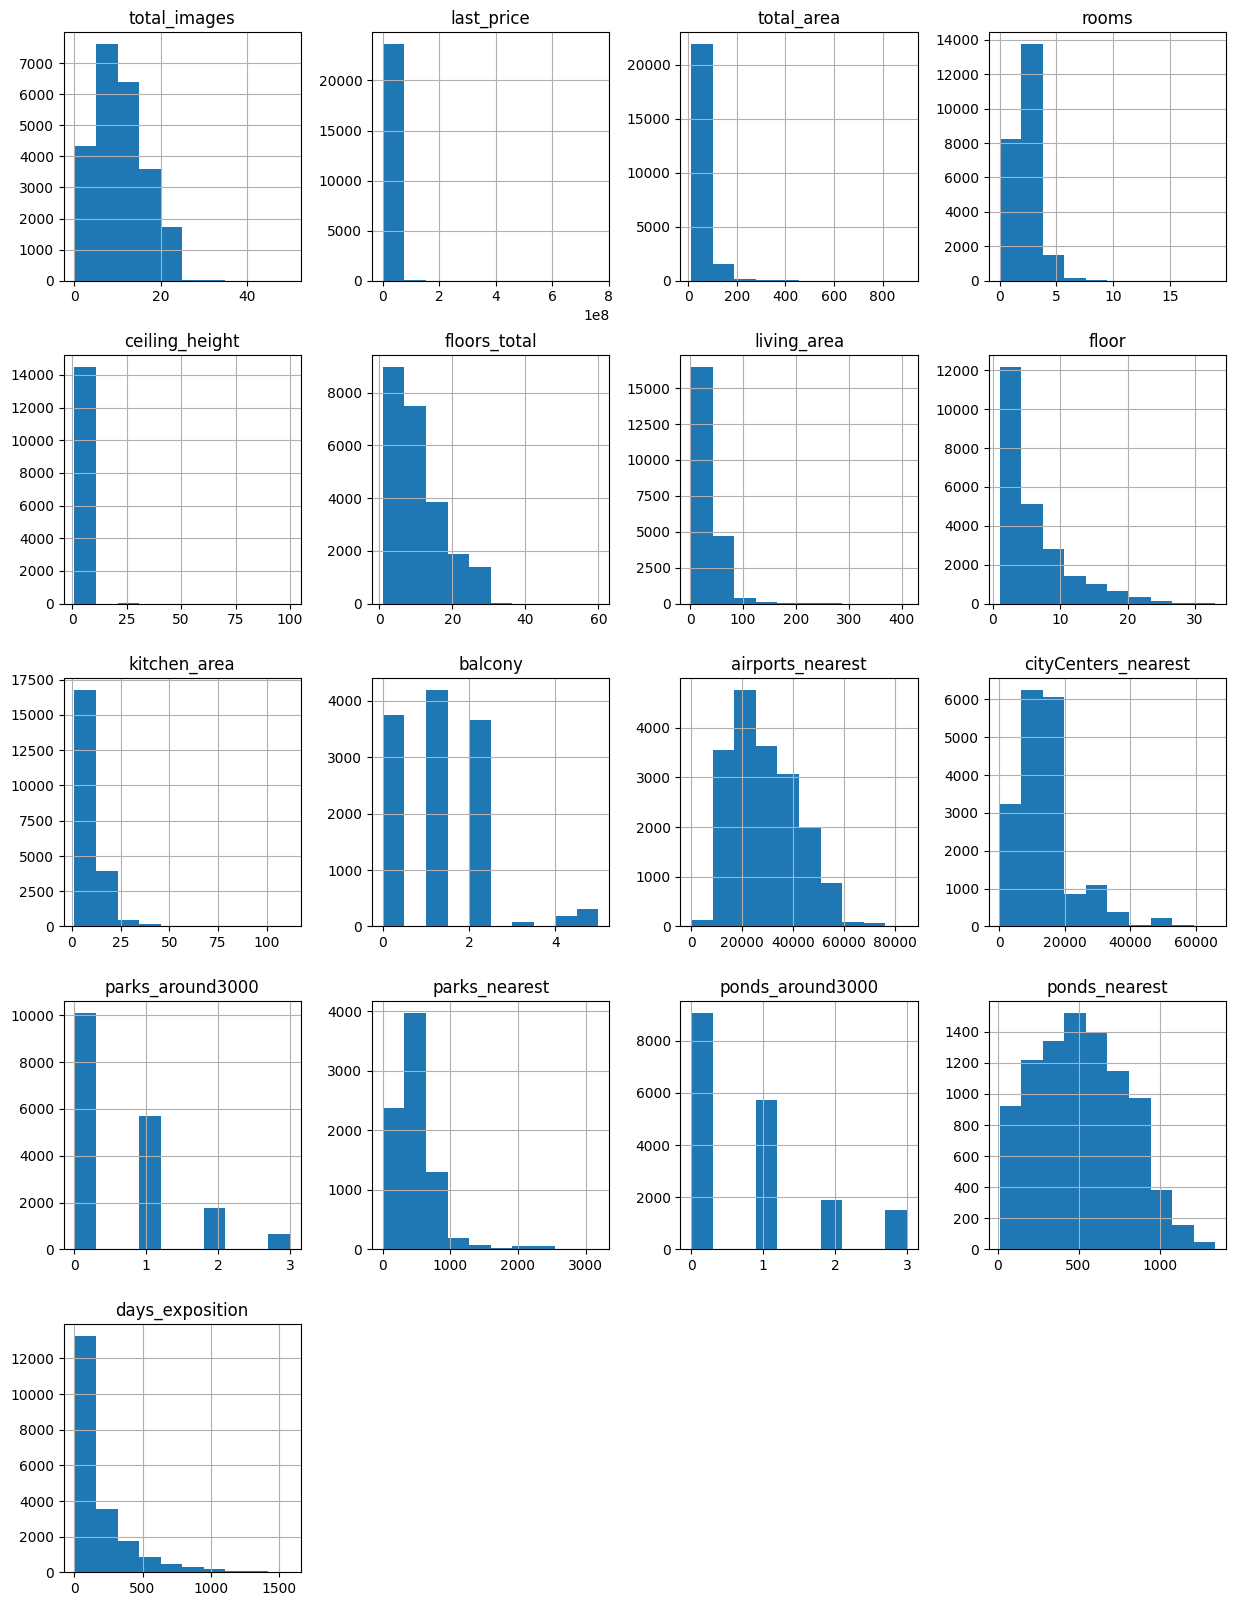

In [3]:
# Generate histograms for each column in the DataFrame
# figsize is specified to adjust the size of the output figure
data.hist(figsize=(15, 20))

# Display the generated histograms
plt.show()

**Conclusion:**

The data includes a total of 23699 entries and 22 columns. Each row represents a real estate listing and provides various information related to the property.

* Six of the columns are integers, 14 are floats, and the remaining three are of type `object` (it can include strings).
* There are also two boolean fields - `studio` and `open_plan` that indicate the type of apartment.

There are columns with missing values:

* `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` have missing values that may need to be addressed during the data cleaning process.

Columns `balcony`, `parks_around3000`, `ponds_around3000` and `days_exposition` are `floats` but these columns seem to better suit the integer dtype because the listed variables generally don't have fractional values.

The `first_day_exposition` column is detected as an object. It is likely that this column represents the date the ad was first published, which would be preferable as a datetime object.

The `is_apartment` column contains boolean values, but only 2775 out of total 23699 rows have a value, which means this column may not be very useful in further analysis unless we can reasonably fill in the missing values.

<a id="num4"></a>
## 2. Data preprocessing

<a id="num4.1"></a>
### 2.1 Handling empty values

**Find and examine the missing values in the columns.**

In [4]:
# Identify missing values in each column
missing_values = data.isnull().sum()

# Print the result
print(missing_values)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [5]:
missing_values_percentage = (data.isnull().sum() / len(data)) * 100
# Print the result
print(missing_values_percentage)

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64


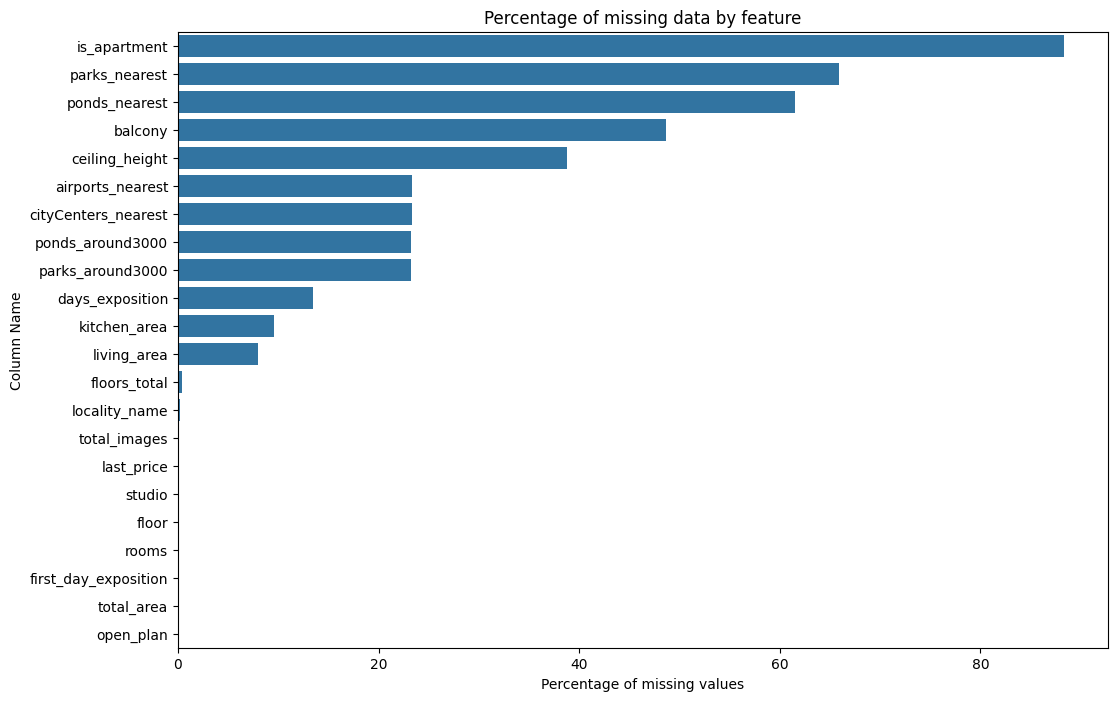

In [6]:
# Convert Series to DataFrame
missing_values_df = pd.DataFrame({'column_name': data.columns,
                                  'percentage_missing': missing_values_percentage})

# Sort DataFrame by percentage of missing values
missing_values_df = missing_values_df.sort_values('percentage_missing', ascending=False)

# Create a bar plot
plt.figure(figsize=(12,8))
sns.barplot(x=missing_values_df['percentage_missing'], y=missing_values_df['column_name'])
plt.xlabel('Percentage of missing values')
plt.ylabel('Column Name')
plt.title('Percentage of missing data by feature')
plt.show()

**Let us fill in the missing values in the `ceiling_height` column with the median, taking into account that apartments in the center of St. Petersburg on average have higher ceiling heights than apartments in modern districts of the city.**

In [7]:
# Convert 'cityCenters_nearest' from meters to kilometers and fill missing values with 0
data['distance_km'] = (data['cityCenters_nearest'] / 1000).fillna(0).astype('int')

# Create a subset of data for the city 'Санкт-Петербург'
data_spb = data[data['locality_name'] == 'Санкт-Петербург']

# Create a pivot table to calculate the median 'ceiling_height' for each 'distance_km'
ceiling_height_km = data_spb.pivot_table(index='distance_km', values='ceiling_height', aggfunc='median')

# Get list of unique 'distance_km' values
distances = ceiling_height_km.index.tolist()

# Loop through each unique distance
for distance in distances:
    # Calculate median height for current distance
    median_height = ceiling_height_km.loc[distance, 'ceiling_height']
    
    # Fill missing 'ceiling_height' values for all apartments at the current distance from the center
    data.loc[(data['distance_km'] == distance) & (data['ceiling_height'].isna()), 'ceiling_height'] = median_height

# Check if there are still missing values in 'ceiling_height'
if data['ceiling_height'].isna().sum() > 0:
    # Calculate the global median 'ceiling_height'
    global_median_height = data['ceiling_height'].median()
    
    # Use the global median to fill in any remaining missing values in 'ceiling_height'
    data['ceiling_height'] = data['ceiling_height'].fillna(global_median_height)

**There are 86 skips in the floors_total column (total number of floors in the house). There are 23699 rows in the whole data set, so the values with such gaps can be deleted, it will not distort our analysis further.**

In [8]:
# Print the original number of rows in the DataFrame
print(f"Original number of rows: {len(data)}")

# Remove rows with missing values in the 'floors_total' column
# 'dropna()' function removes missing values
# The 'subset' parameter is used to specify the columns where we look for missing values
# 'inplace=True' means that the changes are saved to the current DataFrame
data.dropna(subset=['floors_total'], inplace=True)

# Print the new number of rows in the DataFrame
print(f"Number of rows after deleting missing values: {len(data)}")

Original number of rows: 23699
Number of rows after deleting missing values: 23613


**Let's fill in the missing values in the `living_area` column based on the average `living_area` value for apartments with the same number of rooms. Also make sure that the `living_area` does not exceed the total living area.**

In [9]:
# Group the data by the number of rooms
# Then calculate the median living area for each group
median_living_area = data.groupby('rooms')['living_area'].transform('median')

# Fill missing values in the 'living_area' column with the median living area
# for corresponding groups (i.e., the same number of rooms)
data['living_area'] = data['living_area'].fillna(median_living_area)

# However, this may result in living area greater than total area in some cases
# In such cases, replace living area with total area
mask = data['living_area'] > data['total_area']
data.loc[mask, 'living_area'] = data.loc[mask, 'total_area']

**Let's fill in the empty values in the `is_apartment` column**

In [10]:
# The 'notna' function returns a boolean same-sized object indicating if the values are not NA/NaN
# Non-missing values get mapped to True. Missing values get mapped to False.
# 'astype(int)' function then converts these boolean values into integers (True => 1 and False => 0)
data['is_apartment'] = data['is_apartment'].notna().astype(int)

# As a result, the 'is_apartment' column has 0 where it initially had missing values (interpreted as not an apartment),
# and 1 where it had a value (interpreted as is an apartment)

**Let's fill in the empty values in the `kitchen_area` column.**

In [11]:
# Calculate the ratios
kitchen_to_total_ratio = (data.groupby('rooms')['kitchen_area'].transform('median') /
                          data.groupby('rooms')['total_area'].transform('median'))

kitchen_to_living_ratio = (data.groupby('rooms')['kitchen_area'].transform('median') /
                           data.groupby('rooms')['living_area'].transform('median'))

# Calculate global ratio
global_kitchen_to_total_ratio = data['kitchen_area'].median() / data['total_area'].median()
global_kitchen_to_living_ratio = data['kitchen_area'].median() / data['living_area'].median()

# Fill missing values
missing_kitchen = data['kitchen_area'].isnull()
data.loc[missing_kitchen, 'kitchen_area'] = kitchen_to_total_ratio * data['total_area']
exceeds_living = data['kitchen_area'] > data['living_area']
data.loc[exceeds_living, 'kitchen_area'] = kitchen_to_living_ratio * data['living_area']
exceeds_total = data['kitchen_area'] > data['total_area']
data.loc[exceeds_total, 'kitchen_area'] = data['total_area']

# Check if there are still NaNs
if data['kitchen_area'].isna().sum() > 0:
    # Fill remaining NaNs
    missing_kitchen = data['kitchen_area'].isnull()
    data.loc[missing_kitchen, 'kitchen_area'] = global_kitchen_to_total_ratio * data['total_area']
    exceeds_living = data['kitchen_area'] > data['living_area']
    data.loc[exceeds_living, 'kitchen_area'] = global_kitchen_to_living_ratio * data['living_area']
    exceeds_total = data['kitchen_area'] > data['total_area']
    data.loc[exceeds_total, 'kitchen_area'] = data['total_area']

**Let's fill in the empty values in the `balcony` column.**

In [12]:
# Fill missing values in 'balcony' column with 0
# The 'fillna' function is used to fill missing values
data['balcony'] = data['balcony'].fillna(0)

**The `locality_name` column has empty values that are few (48). Let's delete these values.**

In [13]:
# First, let's print the original size of the DataFrame
print("Original size of the DataFrame: ", data.shape)

# Remove rows where 'locality_name' is missing (NaN)
data = data.dropna(subset=['locality_name'])

# Let's print the size of the DataFrame after removing the rows to see how many were removed
print("Size of the DataFrame after removing rows: ", data.shape)

Original size of the DataFrame:  (23613, 23)
Size of the DataFrame after removing rows:  (23565, 23)


In [14]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
distance_km                 0
dtype: int64

<a id="num4.2"></a>
### 2.2 Data type processing 

**Replacing the object data type in the `first_day_exposition` column with datetime64.**

In [15]:
# Let's output the data type of each column 
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment              int32
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
distance_km               int32
dtype: object

In [16]:
# Replacing the object data type in the `first_day_exposition` column with datetime64.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                     int32
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
distance_km                      int32
dtype: object

<a id="num4.3"></a>
### 2.3 Processing implicit duplicates

In [17]:
# Count the number of unique locality names in the 'sort_locality_name' column
print('The number of unique values in the ''locality_name column'':', data['locality_name'].nunique())

The number of unique values in the locality_name column: 364


In [18]:
# Replace the character 'ё' with 'е' in the 'locality_name' field
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')


def sort_locality_name(row):
    # Remove certain phrases from the locality names
    phrases_to_remove = ['городского типа', 'городской', 'коттеджный']
    for phrase in phrases_to_remove:
        if phrase in row:
            return row.replace(phrase, '').strip()
    # If none of the phrases are found, return the original name
    return row.strip()


# Apply the above function to the 'locality_name' field 
# and create a new column 'sort_locality_name' with the cleaned names
data['sort_locality_name'] = data['locality_name'].apply(sort_locality_name)


# Count the number of unique locality names in the 'sort_locality_name' column
unique_locality_count = data['sort_locality_name'].nunique()

print('Number of unique values after processing implicit duplicates in the ''locality_name column'': ', unique_locality_count)

Number of unique values after processing implicit duplicates in the locality_name column:  329


<a id="num4.4"></a>
### 2.4 Processing of abnormal values 

**Let's fix the values in the 'ceiling_height' column.**

In [19]:
# Identify knock-out values in the 'ceiling_height' column.
# Any value greater than 13 is considered a knock-out value.
knock_out_values = data['ceiling_height'] > 13

# Correct the knock-out values by dividing them by 10.
data.loc[knock_out_values, 'ceiling_height'] /= 10

**Let's identify and remove anomalous values in other columns.**

**We take into account that we want to remove no more than 10% of the data from the entire dataset, so we will reduce the quartile values.**

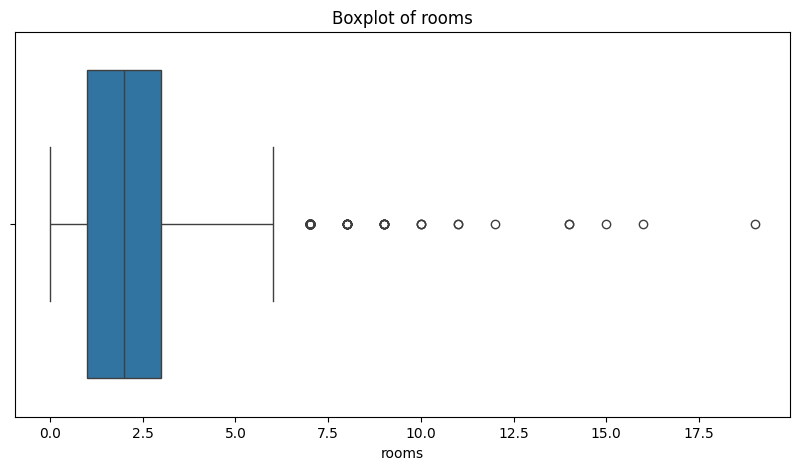

Percentage of anomalous values in rooms: 0.38%


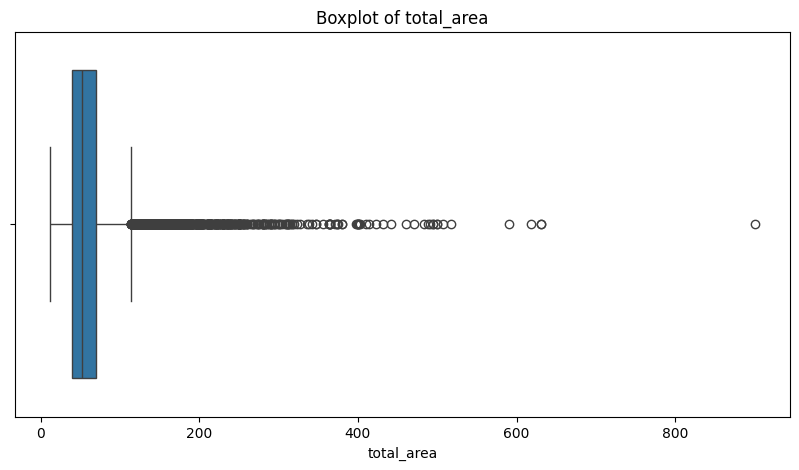

Percentage of anomalous values in total_area: 2.32%


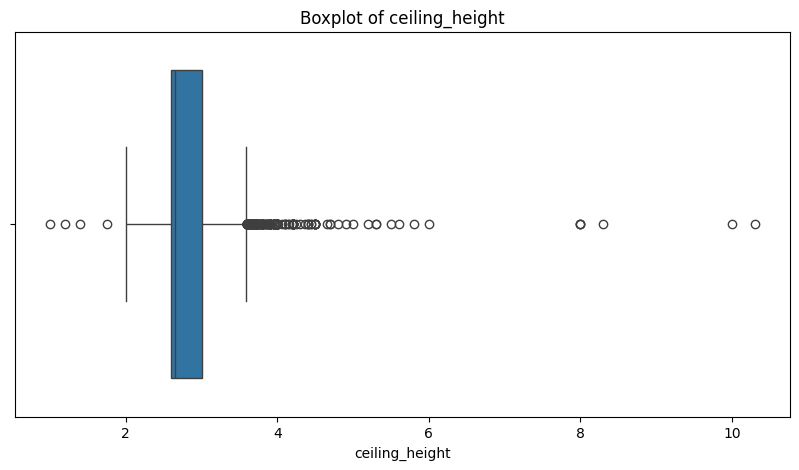

Percentage of anomalous values in ceiling_height: 0.16%


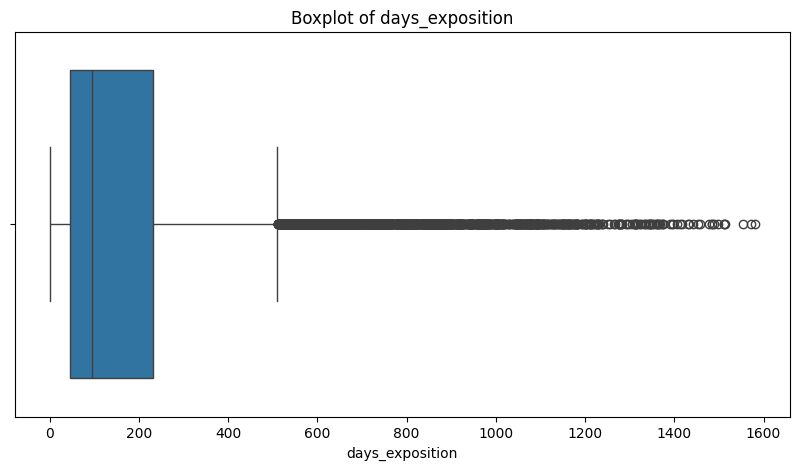

Percentage of anomalous values in days_exposition: 1.99%


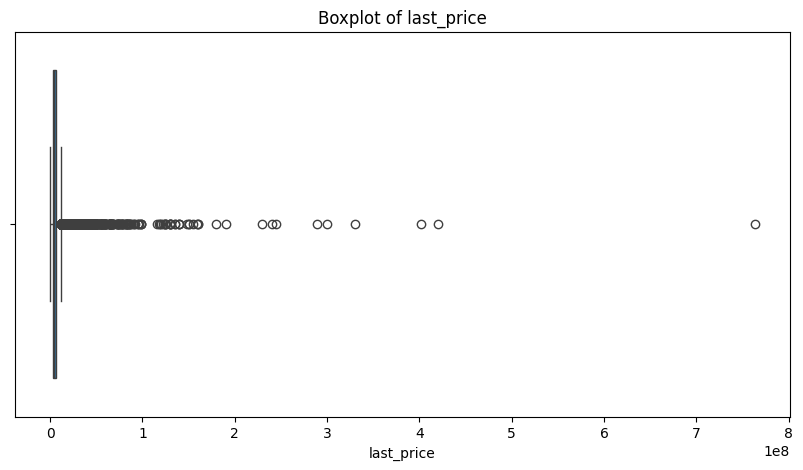

Percentage of anomalous values in last_price: 3.81%


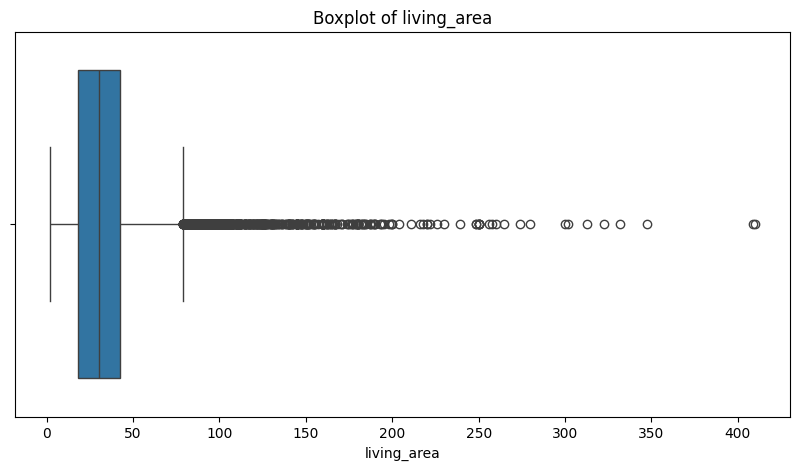

Percentage of anomalous values in living_area: 1.90%


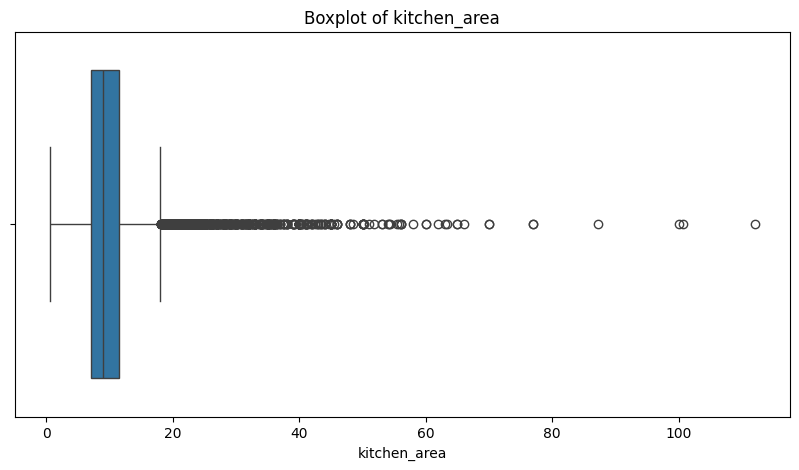

Percentage of anomalous values in kitchen_area: 2.21%


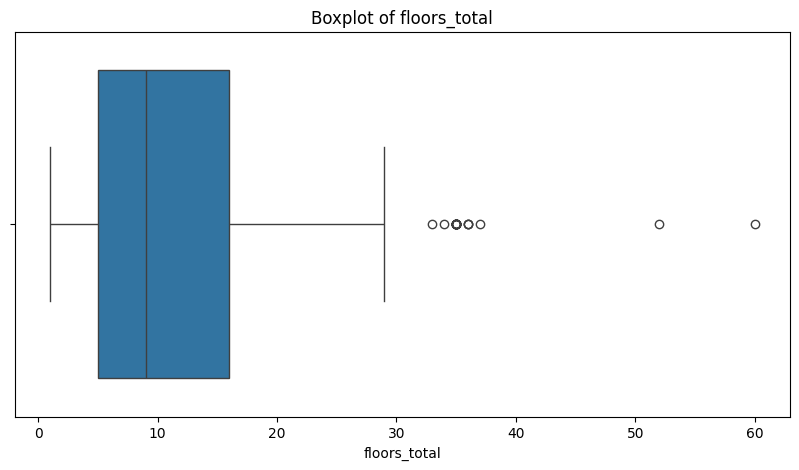

Percentage of anomalous values in floors_total: 0.01%


In [20]:
# Define the list of the columns we'll be checking for anomalies
columns = ['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area', 'kitchen_area', 'floors_total']

# Loop through each column
for column in columns:
    # Create a new figure for each column's boxplot
    plt.figure(figsize=(10, 5))
    # Generate boxplot for the current column
    sns.boxplot(x=data[column])
    # Set the title for the boxplot
    plt.title(f'Boxplot of {column}')
    # Display the boxplot
    plt.show()

    # Calculate the first quartile of the column's data
    Q1 = data[column].quantile(0.15)
    # Calculate the third quartile of the column's data
    Q3 = data[column].quantile(0.85)
    # Calculate the Interquartile Range (IQR) of the column's data
    IQR = Q3 - Q1

    # Identify and store outliers in the current column (values less than Q1 - 1.5*IQR or greater than Q3 + 1.5*IQR)
    outliers = data[((data[column] < (Q1 - 1.5 * IQR)) |(data[column] > (Q3 + 1.5 * IQR)))]
    # Calculate the percentage of outliers in the dataset
    percentage = len(outliers) / len(data) * 100

    # Print the percentage of outliers in the current column of data
    print(f"Percentage of anomalous values in {column}: {percentage:.2f}%")

In [21]:
# Create a copy of the original DataFrame to avoid altering the original data
df = data.copy()

# Iterate through each column
for column in columns:
    # Compute the first quartile of the column's data
    Q1 = data[column].quantile(0.15)
    # Compute the third quartile of the column's data
    Q3 = data[column].quantile(0.85)
    # Compute the Interquartile Range (IQR) of the column's data
    IQR = Q3 - Q1

    # Filter out the outliers from the DataFrame. The "~" operator means "not". 
    # So this line keeps only the data that is NOT less than Q1 - 1.5*IQR or more than Q3 + 1.5*IQR 
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) |(df[column] > (Q3 + 1.5 * IQR)))]

# Print the original size of the dataset
print("Original size of dataset: ", len(data))
# Print the size of the dataset after outlier removal
print("Size of dataset after removing anomalies: ", len(df))

Original size of dataset:  23565
Size of dataset after removing anomalies:  21815


In [22]:
# Calculate the number of rows which are deleted.
deleted_rows = len(data) - len(df)

# Calculate the percentage of data deleted.
deleted_percentage = (deleted_rows / len(data)) * 100

# Print the percentage of data deleted.
print(f"Percentage of data deleted: {deleted_percentage:.2f}%")

Percentage of data deleted: 7.43%


<a id="num4.5"></a>
### 2.5 Adding new columns

* price of one square meter - `price_of_one_square_m`

* day of the week of announcement publication (0 - Monday, 1 - Tuesday and so on) - `day_of_the_week_publication`

* month of announcement publication - `month_of_publication`

* year of the advertisement publication - `year_of_publication`

* apartment floor type (values - "first", "last", "other") - `floor_type`

* distance to the city center in kilometers (convert from m to km and round up to integer values) - `distance_km`

In [23]:
# Create a new column 'price_of_one_square_m' in the DataFrame 'data'. This column shows the price of one square meter in the apartment by dividing the column 'last_price' by 'living_area'.
df['price_of_one_square_m'] = df['last_price'] / df['living_area']

# Create a new column 'day_of_the_week_publication' in the DataFrame 'data'. This column shows the day of the week when the ad was published. The 'dayofweek' attribute returns the day of the week as an integer, where Monday is 0 and Sunday is 6.
df['day_of_the_week_publication'] = pd.DatetimeIndex(df['first_day_exposition']).dayofweek 

# Create a new column 'month_of_publication' in the DataFrame 'data'. This column shows the month when the ad was published.
df['month_of_publication'] = pd.DatetimeIndex(df['first_day_exposition']).month

# Create a new column 'year_of_publication' in the DataFrame 'data'. This column shows the year when the ad was published.
df['year_of_publication'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [24]:
# Define a function that will categorize each row based on its floor number
def floor_type_calc(row):
    if row['floor'] == 1:   # If the floor number is 1, classify it as 'first' 
        return 'first'
    elif row['floor'] == row['floors_total']:   # If the floor number is the same as the total number of floors, classify it as 'last'
        return 'last'
    else: 
        # If the floor number is greater than 0 (i.e., it's not a basement), classify it as 'other'
        # Otherwise, classify it as 'basement'
        return 'other' if row['floor'] > 0 else 'basement'

# Preprocess the 'floor' column by setting floor numbers that are less than or equal to 0 as NaN (null), as these may represent data errors or special cases
df.loc[df['floor'] <= 0, 'floor'] = np.nan

# Apply the floor_type_calc function to each row (identified by axis=1) of the DataFrame
# The result is a new series that categorizes each row as 'first', 'last', 'other', or 'basement' 
# This new series is assigned as a new column 'floor_type' in the DataFrame
df['floor_type'] = df[['floor', 'floors_total']].apply(floor_type_calc, axis=1)

In [25]:
# Convert 'cityCenters_nearest' from meters to kilometers by dividing by 1000, fill any NaN values with 0
df['distance_km'] = (df['cityCenters_nearest'] / 1000).fillna(0).round().astype('int')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21815 entries, 1 to 23698
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_images                 21815 non-null  int64         
 1   last_price                   21815 non-null  float64       
 2   total_area                   21815 non-null  float64       
 3   first_day_exposition         21815 non-null  datetime64[ns]
 4   rooms                        21815 non-null  int64         
 5   ceiling_height               21815 non-null  float64       
 6   floors_total                 21815 non-null  float64       
 7   living_area                  21815 non-null  float64       
 8   floor                        21815 non-null  float64       
 9   is_apartment                 21815 non-null  int32         
 10  studio                       21815 non-null  bool          
 11  open_plan                    21815 non-null  b

**Conclusion:**

1. Missing values in the required columns were filled in.

2. The data type was corrected.

3. Implicit duplicates were corrected.

4. Fixed knock-out values in the 'ceiling_height' column.

5. Removed anomalous values from the dataset 7.43% of the data from the entire dataset. 

6. Added new columns:

* `price_of_one_square_m`.
* `day_of_the_week_publication`.
* `month_of_the_week_publication`.
* `year_of_publication`.
* `floor_type`
* `distance_km`


<a id="num5"></a>
## 3. Exploratory data analysis 

**Let us study the object parameters listed below and construct separate histograms for each of these parameters:**

* total area;
* living area;
* kitchen area;
* price of the object;
* number of rooms;
* ceiling height;
* type of apartment floor ("first", "last", "other");
* total number of floors in the building;
* distance to the city center in meters;
* distance to the nearest park


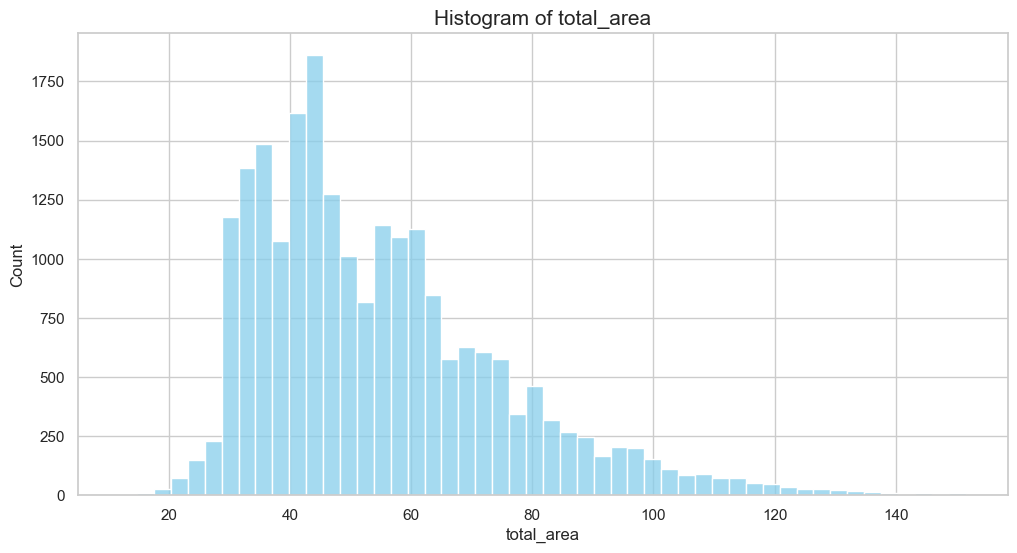

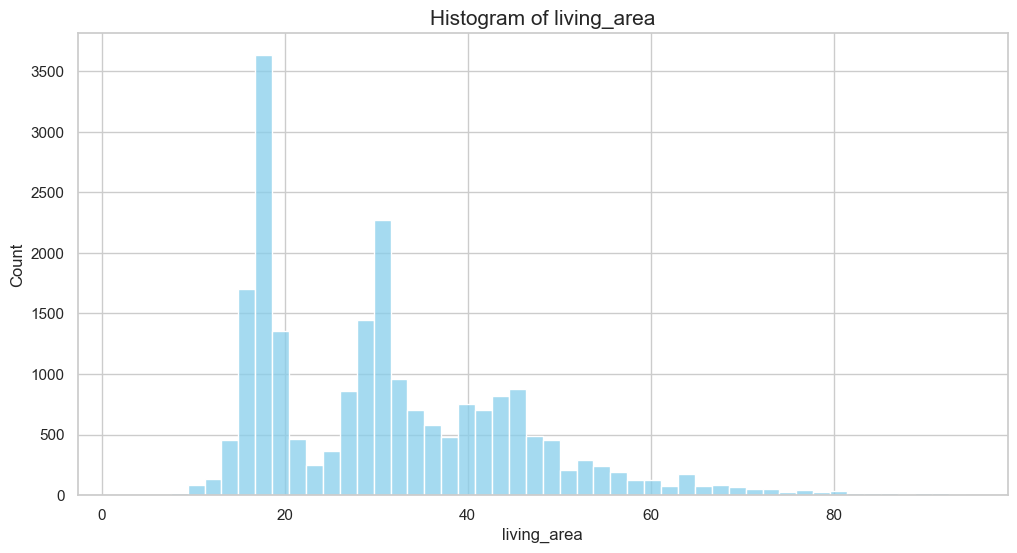

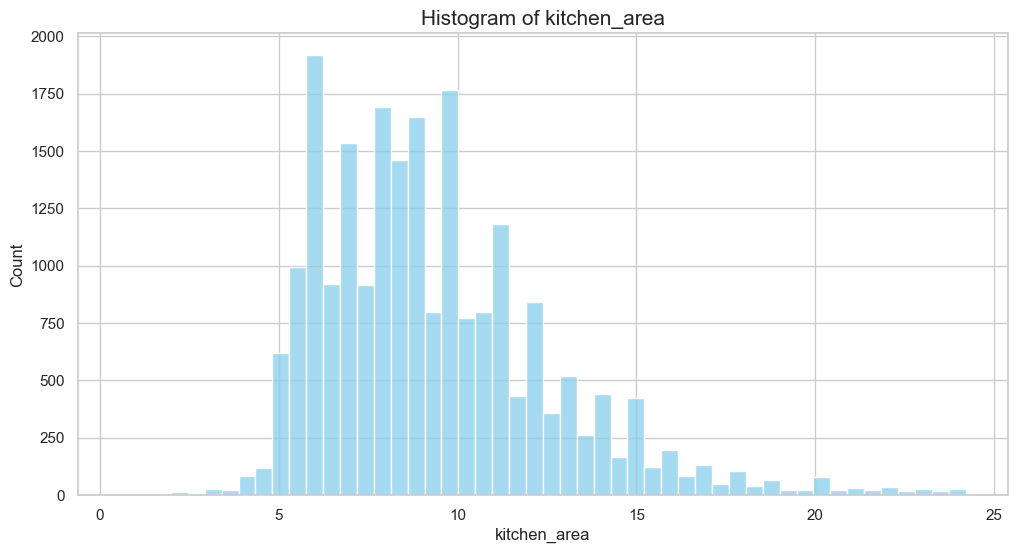

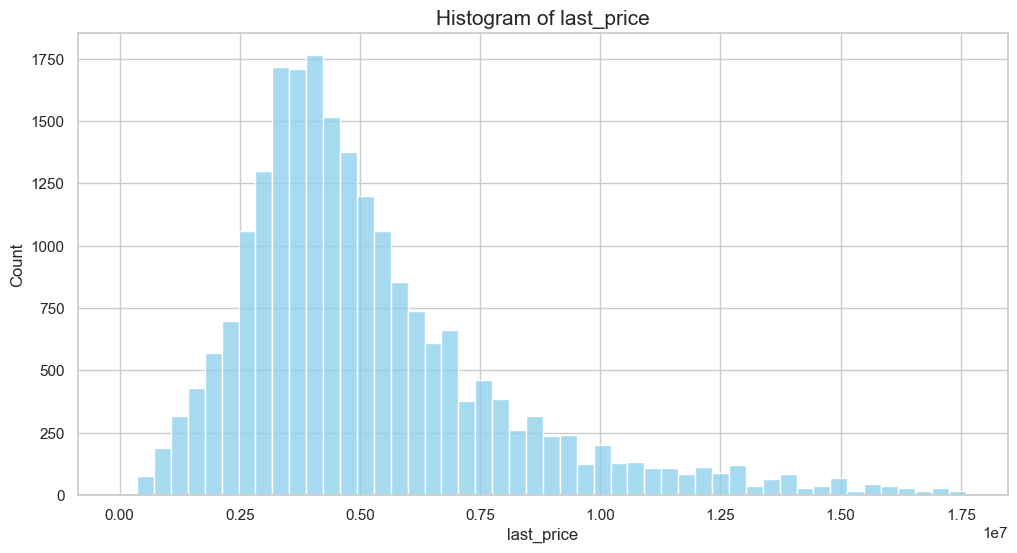

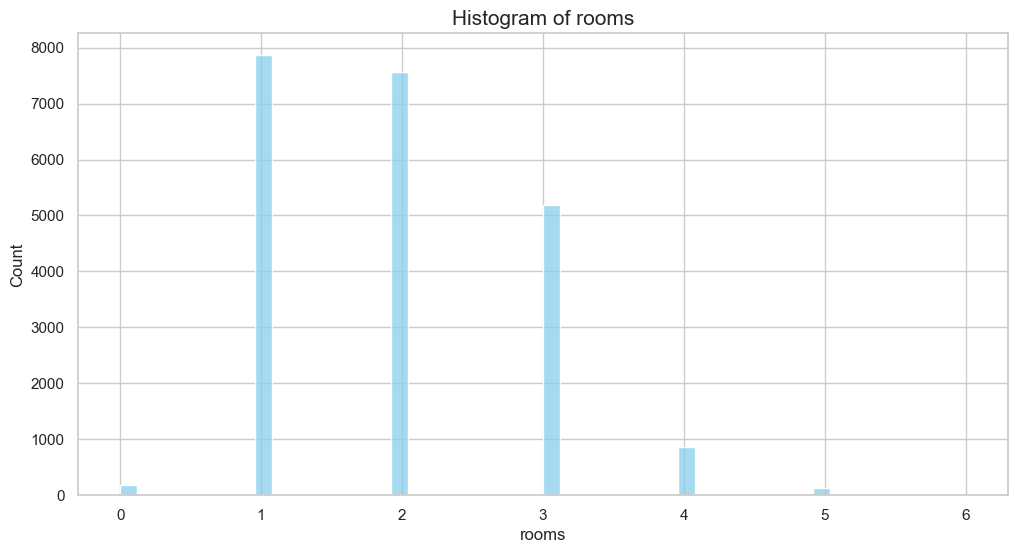

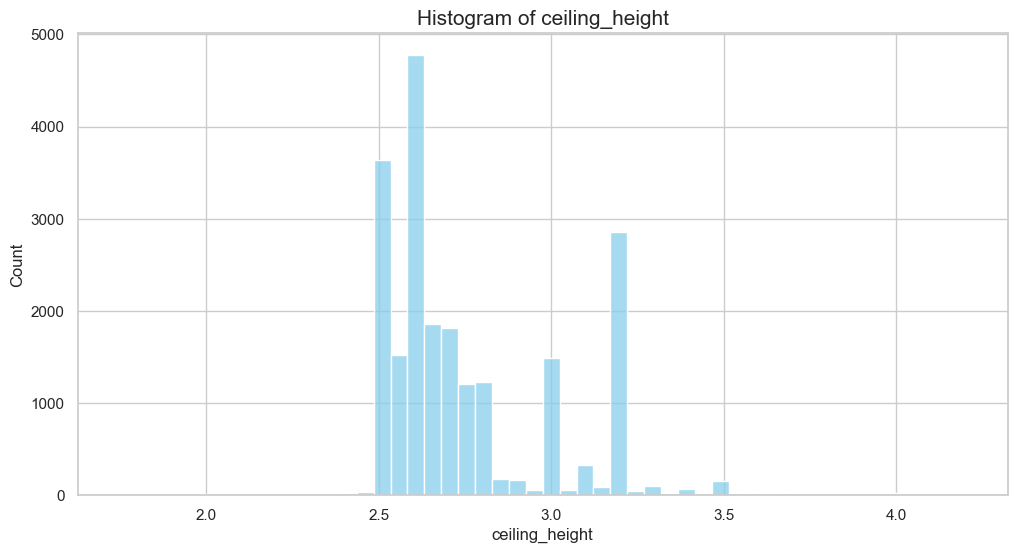

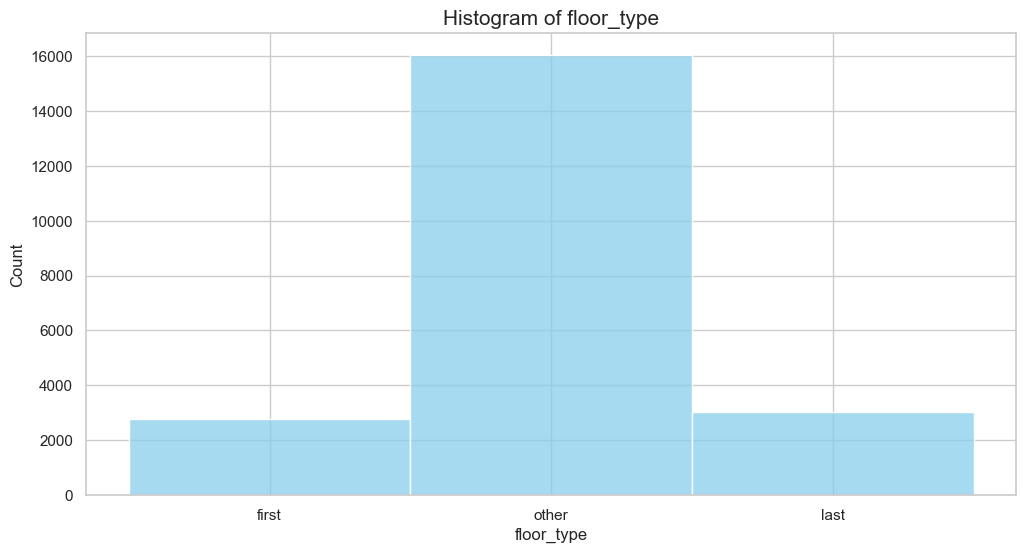

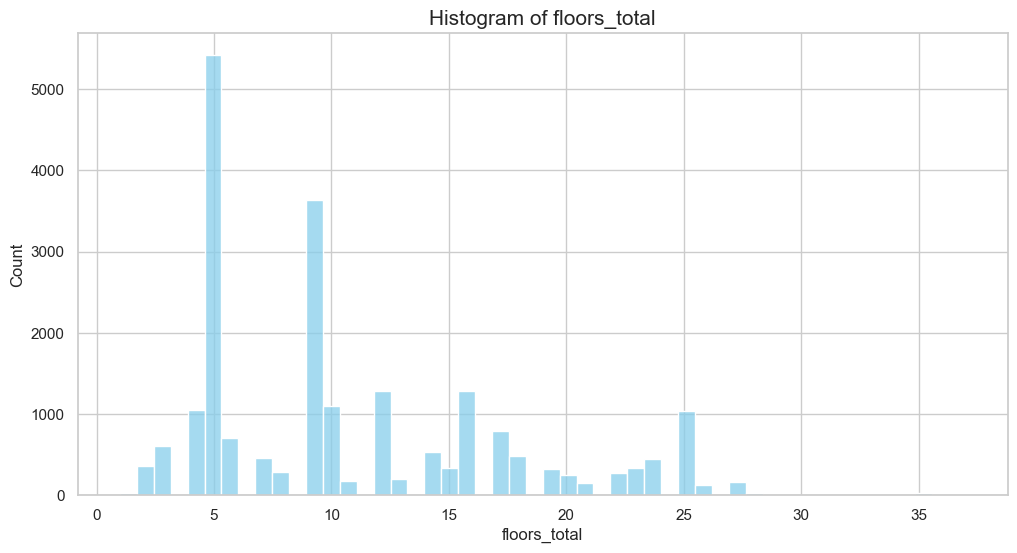

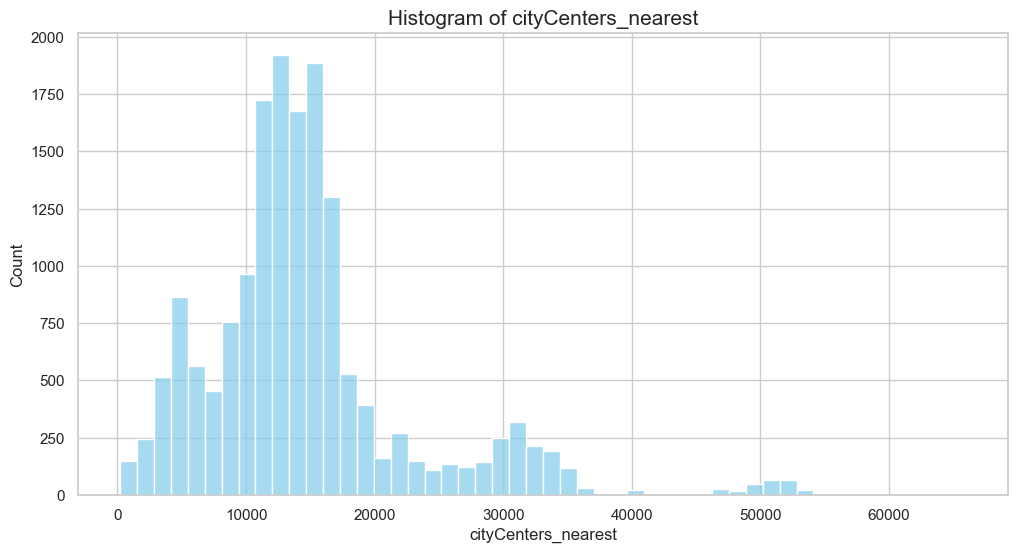

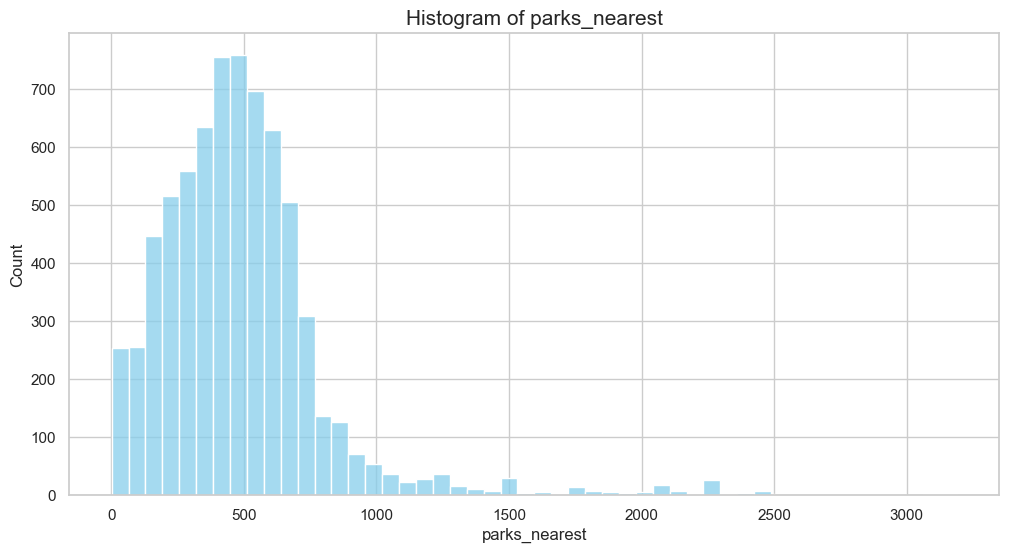

In [27]:
sns.set(style = "whitegrid")  # Apply seaborn whitegrid style to the plots.

parameters = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 
              'ceiling_height', 'floor_type', 'floors_total', 'cityCenters_nearest', 'parks_nearest']

for parameter in parameters:
    plt.figure(figsize=(12, 6))
    plt.title(f'Histogram of {parameter}', fontsize=15)

    if df[parameter].dtype == 'object':  # if the data type of the column is non-numeric
        sns.histplot(x=parameter, data=df, color='skyblue', discrete=True)  # create a bar plot
    else:  # if the data type of the column is numeric
        sns.histplot(df[parameter], color='skyblue', bins=50, kde=False)  # create a histogram

    plt.show()

In [28]:
df['total_area'].describe()

count    21815.000000
mean        54.500039
std         20.318040
min         12.000000
25%         39.200000
50%         50.000000
75%         65.000000
max        151.500000
Name: total_area, dtype: float64

**Conclusions on the total floor area of the apartment:**

* The mean (average) total area of a property is approximately 54.5 square meters.

* The standard deviation of the total area is around 20.32 square meters, which indicates a reasonable variation in property sizes.

* The minimum total area recorded is 12 square meters, which means there are quite compact properties in the listings.

* Looking at the quartile measures, 25% of the properties have a total area less than or equal to approximately 39.2 square meters, 50% (which is also the median of the data) are less than or equal to 50 square meters, and 75 % of the properties have total area less than or equal to 65 square meters.

* The maximum total area recorded is much larger at 151.5 square meters indicating that there are a few larger properties in our listings as well.

Overall, these statistics reveal that most of the properties listed tend to be around the 54.5 square meter mark, with a reasonable range in property sizes across the dataset.

In [29]:
df['living_area'].describe()

count    21815.000000
mean        31.222139
std         14.082540
min          2.000000
25%         18.000000
50%         30.000000
75%         40.150000
max         94.400000
Name: living_area, dtype: float64

**Conclusions on the living area of the apartment:**

* The average living area across all listings is approximately 31.22 square meters.

* The standard deviation of around 14.08 indicates a moderate variability in the living area sizes across different properties.

* The smallest living area recorded is just 2 square meters, hinting at some exceptionally compact properties in the dataset.

* The quartile measures reveal that 25% of the properties have a living area less than or equal to 18 square meters. The median living area size (i.e., the 50th percentile) is 30 square meters, meaning that half of all properties have a living area less than or equal to this size. 75% of the properties have a living area less than or equal to 40.15 square meters.

* The maximum living area recorded is quite spacious at 94.4 square meters.

These statistics suggest that while the properties generally tend to have a living area around 31.22 square meters, there is a significant variation in living area sizes across the dataset, with some exceptionally large and small figures included.

In [30]:
df['kitchen_area'].describe()

count    21815.000000
mean         9.365396
std          3.226289
min          0.570492
25%          7.000000
50%          9.000000
75%         11.000000
max         24.200000
Name: kitchen_area, dtype: float64

**Kitchen area conclusions:** 

* The average kitchen area in all the properties listed is approximately 9.37 square meters.

* The standard deviation, which is about 3.23, suggests a moderate variation in the sizes of the kitchens across different properties.

* The smallest kitchen area on record is extremely compact, at just around 0.57 square meters.

* Moving to the quartiles, 25% of properties have a kitchen area less than or equal to 7 square meters, indicating that a quarter of all kitchens are quite small. The median kitchen area, which also marks the 50th percentile, is 9 square meters - which means half of all properties have a kitchen area of 9 square meters or less. Further, 75% of properties have a kitchen area that is less or equal to 11 square meters.

* The largest kitchen area in the dataset is quite spacious at 24.2 square meters.

In summary, while there is a significant range in kitchen sizes, most properties have a kitchen area in the proximity of 9.37 square meters.

In [31]:
df['last_price'].describe()

count    2.181500e+04
mean     5.149144e+06
std      2.785110e+06
min      1.219000e+04
25%      3.350000e+06
50%      4.500000e+06
75%      6.223500e+06
max      1.760000e+07
Name: last_price, dtype: float64

**Conclusions about the price of the objects:**

* The average price of properties listed is approximately 5.15 million rubles.

* The standard deviation is around 2.79 million, suggesting there's a significant variation in property prices.

* The lowest price property listed is extremely low at just 12,190. This could indicate either a listing error, or a distressed sale or unusual property type.

* Looking at the quartiles, 25% of the properties are listed at a price of 3.35 million or below, while half of all properties are listed at a price of 4.5 million or less, as indicated by the median value. Also, 75% of properties are listed at a price of 6.22 million or below.

* The most expensive property listing in the dataset is priced at a very significant 17.6 million, demonstrating the presence of luxury properties in the dataset.

In summary, there's a large range in the listed property prices - from about 12,000 up to 17.6 million, with the average price close to 5.15 million.

In [32]:
df['rooms'].describe()

count    21815.000000
mean         1.959340
std          0.924016
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

**Conclusions about the number of rooms:**

* The average number of rooms in the properties is approximately 1.96, which indicates that most properties listed have around 2 rooms.

* The standard deviation of about 0.92 signifies a moderate variation in the number of rooms among different properties.

* The minimum number of rooms is 0. This could indicate studio apartments or listings where the number of rooms was not specified.

* Looking at the quartiles, 25% of properties have 1 room or less, while the median or the 50th percentile value is 2, signifying that half of the properties have 2 rooms or fewer. Furthermore, 75% of properties have 3 rooms or fewer.

* The property with the maximum number of rooms has 6 rooms, which indicates the presence of relatively larger spaces among the properties listed.

In conclusion, while there is quite a range in the number of rooms per property ranging from 0 to 6, most properties tend to have around 2 rooms.

In [33]:
df['ceiling_height'].describe()

count    21815.000000
mean         2.753625
std          0.258301
min          1.750000
25%          2.600000
50%          2.650000
75%          2.900000
max          4.200000
Name: ceiling_height, dtype: float64

**Conclusions about ceiling heights:**

* The average ceiling height in the dataset is approximately 2.75 meters, suggesting most properties have fairly standard ceiling heights.

* The standard deviation of about 0.26 indicates a small variability in the ceiling heights across different properties.

* The property with the lowest ceiling height has a height of just 1.75 meters, which is quite low compared to typical standards.

* Examining the quartiles, 25% of the properties have a ceiling height of 2.6 meters or lower. The median or 50th percentile is 2.65 meters, suggesting that half of the properties have a ceiling height of 2.65 meters or lower. Meanwhile, 75% of the properties have a ceiling height of less than or equal to 2.9 meters.

* The property with the highest ceiling height stands at 4.2 meters, which is exceptionally high and quite rare in most housing configurations.

In conclusion, though there's a considerable variation in ceiling heights ranging from about 1.75 to 4.2 meters, most properties have ceiling heights around 2.75 meters.

In [34]:
df['floor_type'].describe()

count     21815
unique        3
top       other
freq      16046
Name: floor_type, dtype: object

**Conclusions about the type of floor of the apartment:** 

In summary, 'floor_type' data show that most of the apartments listed are situated on floors other than the first or the last in their buildings.

In [35]:
df['floors_total'].describe()

count    21815.000000
mean        10.783406
std          6.626956
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

**Conclusions about the total number of floors in the house:**

* The average number of total floors in the buildings is approximately 10.78, which suggests that most properties are part of medium-rise buildings.

* The standard deviation of about 6.63 indicates there's a considerable variation in the number of floors among different buildings.

* The building with the fewest floors has just one floor, indicating that there are single-story buildings or houses in the dataset.

* Looking at the quartiles, 25% of properties are part of a building with 5 or fewer floors. The median number of floors is 9, meaning that half of the properties are in buildings with 9 floors or fewer. Furthermore, 75% of properties are in buildings with up to 16 floors.

* The building with the maximum number of floors has 37 floors - suggesting the presence of high-rise structures in the dataset.

In summary, the number of floors in buildings of the listed properties ranges from one to 37, but most buildings are around 10 floors high.


In [36]:
df['cityCenters_nearest'].describe()

count    16455.000000
mean     14702.815011
std       8504.473569
min        208.000000
25%      10295.500000
50%      13412.000000
75%      16528.500000
max      65952.000000
Name: cityCenters_nearest, dtype: float64

**Conclusions about the distance to the city center in meters:**

* The average distance of properties from the city center is approximately 14,703 meters, or around 14.7 kilometers.

* The standard deviation of about 8504 indicates a substantial variation in the distances of different properties from the city center.

* The property closest to the city center is just 208 meters away, suggesting that some properties are located extremely close to the city center.

* Considering the quartiles, 25% of properties are located 10,296 meters (or approximately 10.3 kilometers) or closer to the city center. The median distance to the city center is 13,412 meters (or around 13.4 kilometers), meaning that half of the properties are this distance or closer. Additionally, 75% of properties are within 16,529 meters (or approximately 16.5 kilometers) of the city center.

* The property farthest from the city center is positioned at a significant distance of 65,952 meters, or approximately 66 kilometers.

In conclusion, the distances of listed properties from the city center range from about 0.2 kilometers to 66 kilometers, with most properties situated around 14.7 kilometers away.


In [37]:
df['parks_nearest'].describe()

count    7008.000000
mean      489.796376
std       330.738698
min         1.000000
25%       290.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

**Conclusions about the distance to the nearest park:**

* The average distance to the nearest park from the listed properties is approximately 490 meters. The distances, however, vary greatly as evidenced by a standard deviation of about 331 meters.

* The shortest distance to a park is just 1 meter, meaning there are properties listed that are virtually adjacent to a park. On the other hand, the farthest property is 3190 meters (or roughly 3.19 kilometers) away from the nearest park, which is still within walking distance for most people.

* Half of the properties are within 456 meters of the nearest park, with 25% of properties being closer than 290 meters, and another 25% being farther than 613 meters. 

Overall, it can be said that most of the properties in the dataset are fairly close to a park, which could be a potential selling point for prospective buyers.




**Let's study how fast the apartments were sold (`days_exposition` column). This parameter shows how many days each ad was posted.**

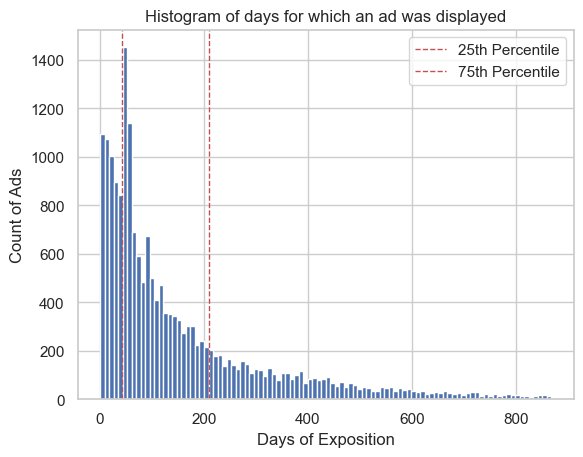

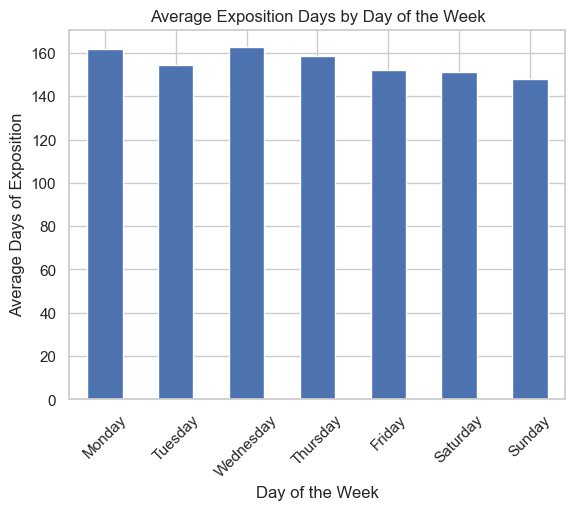

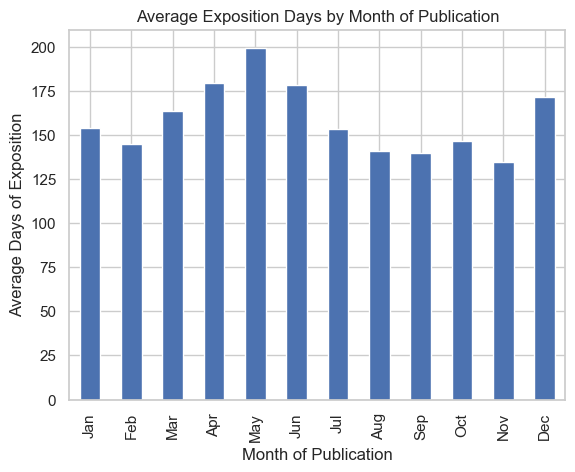

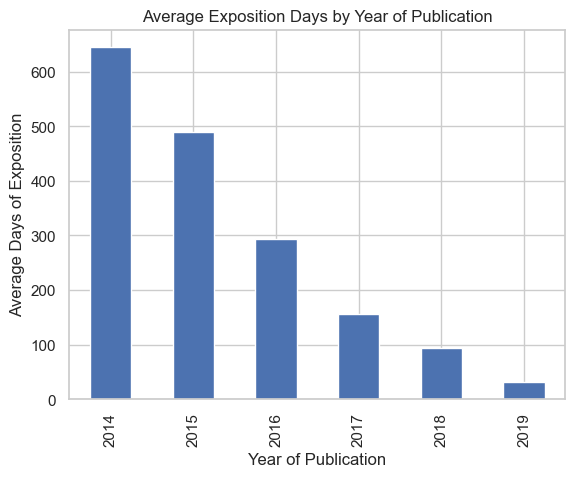

In [38]:
# Now, we construct a histogram for the 'days_exposition' column
Q1 = df['days_exposition'].quantile(0.25)
Q3 = df['days_exposition'].quantile(0.75)

plt.hist(df['days_exposition'], bins=100) 

# Adding percentile line markers for 25th (Q1) and 75th (Q3) percentile
plt.axvline(Q1, color='r', linestyle='dashed', linewidth=1)
plt.axvline(Q3, color='r', linestyle='dashed', linewidth=1)

# Adding legend
plt.legend({'25th Percentile': Q1, '75th Percentile': Q3})

plt.title('Histogram of days for which an ad was displayed')
plt.xlabel('Days of Exposition')
plt.ylabel('Count of Ads')
plt.show()

# Grouping by day_of_the_week_publication
df.groupby('day_of_the_week_publication')['days_exposition'].mean().plot(kind='bar')
plt.title('Average Exposition Days by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Days of Exposition')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.show()

# Grouping by month_of_publication
df.groupby('month_of_publication')['days_exposition'].mean().plot(kind='bar')
plt.title('Average Exposition Days by Month of Publication')
plt.xlabel('Month of Publication')
plt.ylabel('Average Days of Exposition')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Grouping by year_of_publication
df.groupby('year_of_publication')['days_exposition'].mean().plot(kind='bar')
plt.title('Average Exposition Days by Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Average Days of Exposition')
plt.show()

In [39]:
# Now we calculate the mean and median.
mean_days_exposition = df['days_exposition'].mean().round()
median_days_exposition = df['days_exposition'].median().round()

print(f"Mean days of exposition: {mean_days_exposition}")
print(f"Median days of exposition: {median_days_exposition}")

print(f"Fast sales of apartments less than {Q1} days")
print(f"Long sales of apartments for more than {Q3} days")

Mean days of exposition: 157.0
Median days of exposition: 90.0
Fast sales of apartments less than 43.0 days
Long sales of apartments for more than 210.0 days


**Conclusions:**

* The duration an apartment ad was posted doesn't strongly depend on the day of the week it was published. The averages are roughly similar with minimal variability, and most ads were taken down within approximately half a year regardless of the day they were published.

* The data suggests a seasonal pattern, with ads posted around spring and summer (particularly in May) generally being displayed for a longer duration compared to other months. This might indicate a slower real estate market during this period, requiring longer advertising durations for property sales.

* The apartment ads over the years have been closing at a faster rate, significantly reducing the mean, median, and maximum days an ad is usually up for. This could be as a result of various factors such as improvements in the economy, real estate marketplace, or digital advertising techniques.

1. Mean days of exposition: 157
2. Median days of exposition: 90
3. Fast sales of apartments less than 43 days
4. Long sales of apartments for more than 210 days

**Let's determine which factors most affect the total (full) price of the object. Draw graphs showing the dependence of the price on the following parameters.** 

 - total area;
  - living area;
  - kitchen area;
  - number of rooms;
  - type of floor on which the apartment is located (first, last, other);
  - date of accommodation (day of the week, month, year);

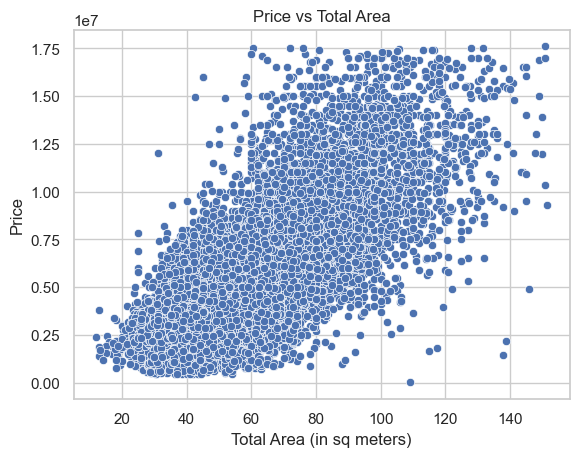

In [40]:
# Total square footage
sns.scatterplot(x=df['total_area'], y=df['last_price'])
plt.title('Price vs Total Area')
plt.xlabel('Total Area (in sq meters)')
plt.ylabel('Price')
plt.show()

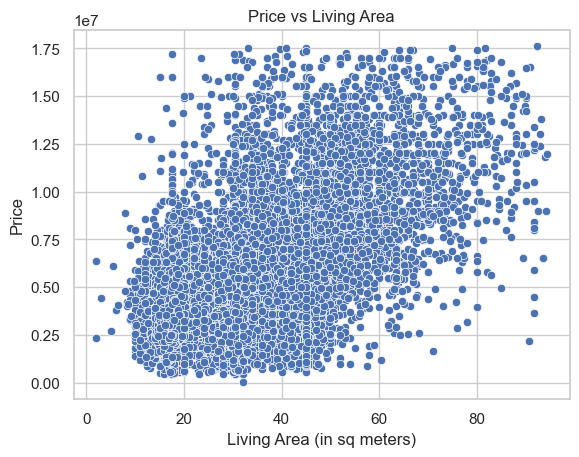

In [41]:
# Living area:
sns.scatterplot(x=df['living_area'], y=df['last_price'])
plt.title('Price vs Living Area')
plt.xlabel('Living Area (in sq meters)')
plt.ylabel('Price')
plt.show()

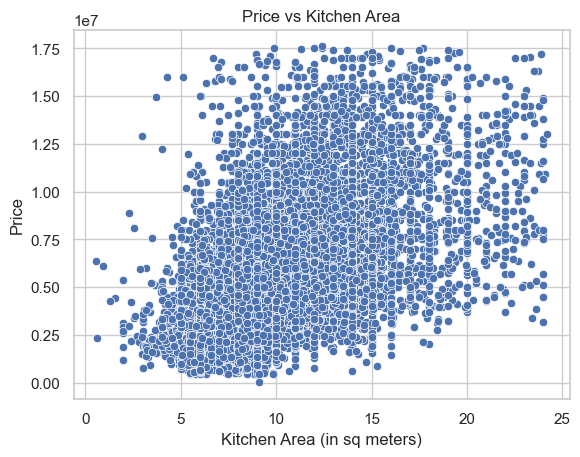

In [42]:
# Kitchen area
sns.scatterplot(x=df['kitchen_area'], y=df['last_price'])
plt.title('Price vs Kitchen Area')
plt.xlabel('Kitchen Area (in sq meters)')
plt.ylabel('Price')
plt.show()

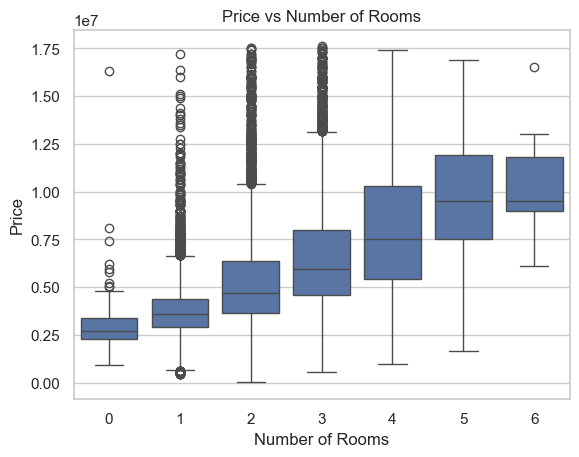

In [43]:
# Number of rooms
sns.boxplot(x=df['rooms'], y=df['last_price'])
plt.title('Price vs Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

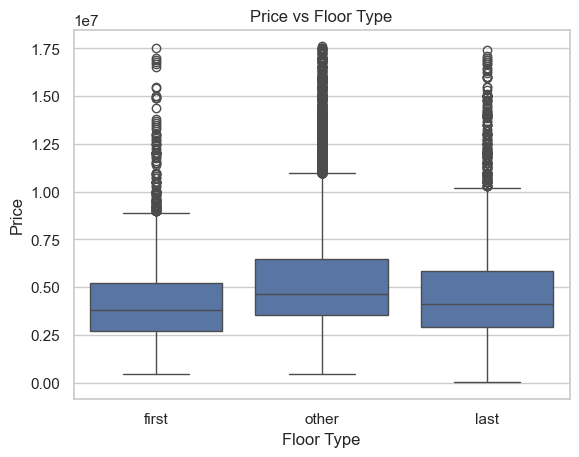

In [44]:
# Type of floor
sns.boxplot(x=df['floor_type'], y=df['last_price'])
plt.title('Price vs Floor Type')
plt.xlabel('Floor Type')
plt.ylabel('Price')
plt.show()

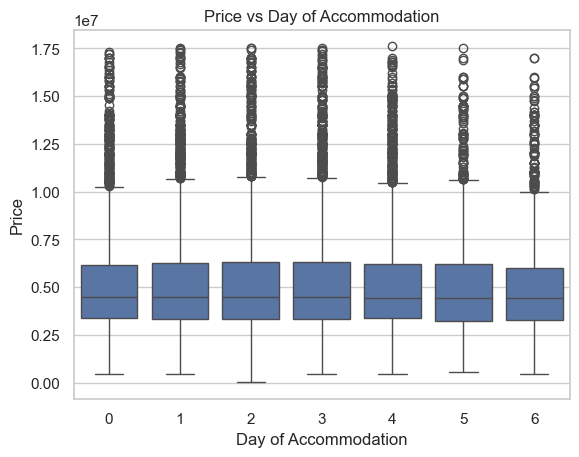

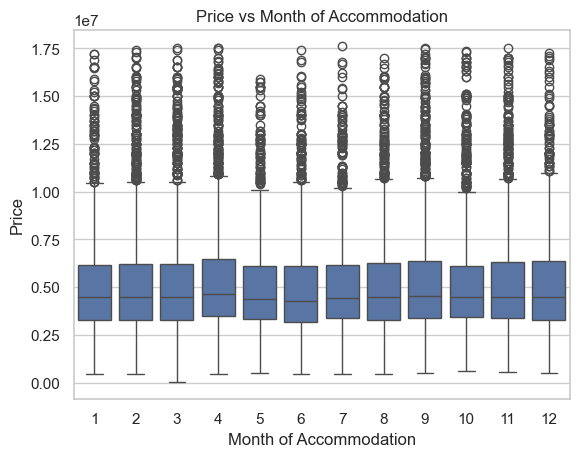

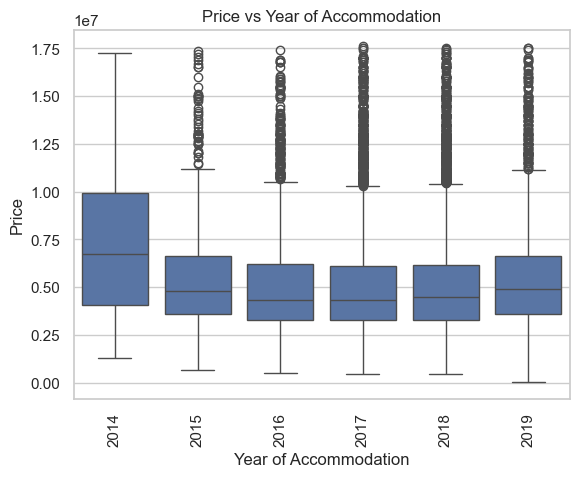

In [45]:
# day of the week
df['day_of_week'] = df['first_day_exposition'].dt.dayofweek
sns.boxplot(x=df['day_of_week'], y=df['last_price'])
plt.title('Price vs Day of Accommodation')
plt.xlabel('Day of Accommodation')
plt.ylabel('Price')
plt.show()

# month
df['month'] = df['first_day_exposition'].dt.month
sns.boxplot(x=df['month'], y=df['last_price'])
plt.title('Price vs Month of Accommodation')
plt.xlabel('Month of Accommodation')
plt.ylabel('Price')
plt.show()

# year
df['year'] = df['first_day_exposition'].dt.year
sns.boxplot(x=df['year'], y=df['last_price'])
plt.title('Price vs Year of Accommodation')
plt.xlabel('Year of Accommodation')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

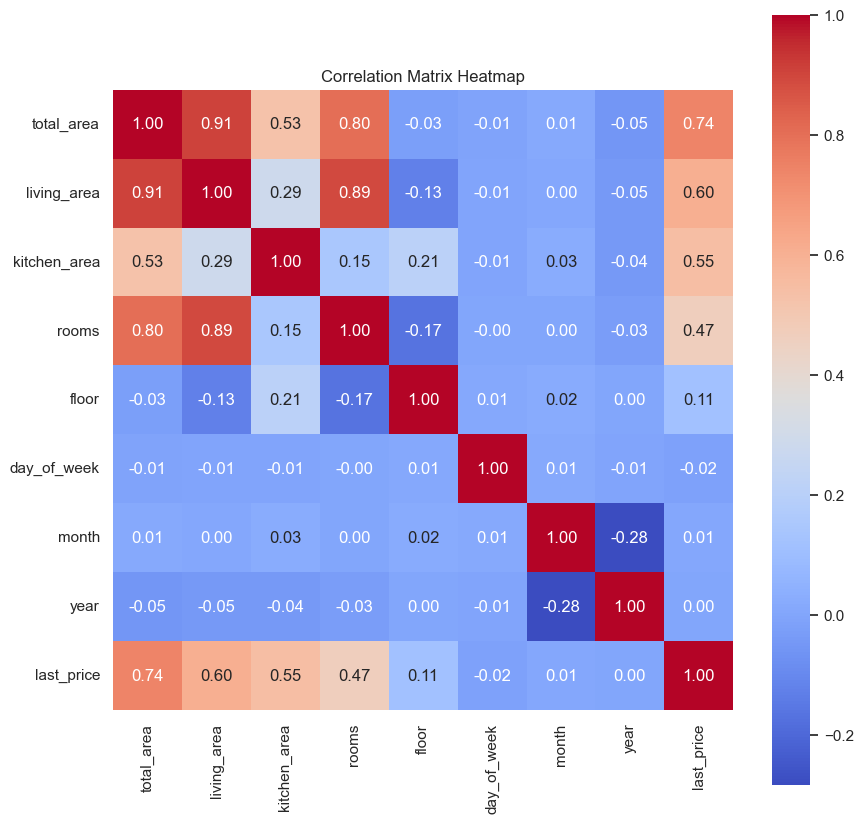

In [46]:
columns = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor', 'day_of_week', 'month', 'year', 'last_price']
df_subset = df[columns]
# Compute the correlation matrix for this subset of columns
corr_matrix = df_subset.corr()

# Plot this using a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title('Correlation Matrix Heatmap')

plt.show()

**Conclusion:**

The correlation coefficient values in the matrix range from -1 to 1, with 1 indicating a perfect positive correlation, -1 indicating a perfect negative correlation, and 0 indicating no correlation.

The attributes that are most significantly positively correlated with `last_price` are `total_area` (0.74), `living_area` (0.60), `kitchen_area` (0.55), and `rooms` (0.47). As these values increase, the price of the apartment also tends to increase. The `total_area` has the highest correlation with `last_price`, suggesting that it's the most influential factor in the price of an apartment.

The factors `floor`, `day_of_week`, `month` have very weak correlation ranges from -0.01 to 0.1 which signify that they have negligible impact on the price.

The attribute `year` has the weakest positive correlation with `last_price` (0.002), almost close to zero. This indicates that there there's almost no relation between the year of publication with the price of the apartment.

Looking at the negative correlations, none of the factors have a significant negative correlation with `last_price`.

**Let's calculate the average price per square meter in 10 settlements with the largest number of ads - build a summary table with the number of ads and the average price per square meter for these settlements. Let's single out the settlements with the highest and lowest price per square meter.**

                   price_per_sqm  num_of_ads
locality_name                               
Санкт-Петербург    107997.061219       14124
поселок Мурино      85729.174157         541
поселок Шушары      78539.728297         434
Всеволожск          67149.004448         384
Пушкин             101119.399014         338
Колпино             75326.398195         333
поселок Парголово   90302.979867         322
Гатчина             68879.095246         297
деревня Кудрово     92598.887109         288
Выборг              58140.576881         225
The locality with the highest price per square meter is Санкт-Петербург.
The locality with the lowest price per square meter is Выборг.


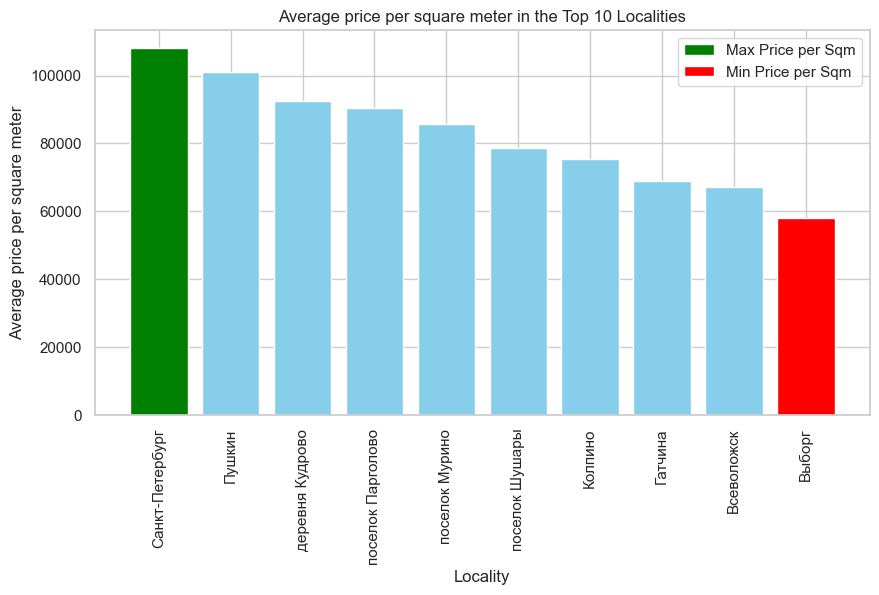

In [47]:
# Add a new column to the dataframe to store the price per square meter of the property
df['price_per_sqm'] = df['last_price'] / df['total_area']

# Identify the top 10 localities having the highest number of ads
top_10_localities = df['locality_name'].value_counts().nlargest(10).index.tolist()

# Extract data of only the top 10 localities
df_top_10_localities = df[df['locality_name'].isin(top_10_localities)]

# Group the data by locality name, and compute the mean price per square meter and count of ads for each locality
summary_table = df_top_10_localities.groupby('locality_name').agg({'price_per_sqm':'mean', 'last_price':'count'}).rename(columns={'last_price':'num_of_ads'}).sort_values(by='num_of_ads', ascending=False)

# Print the summary table
print(summary_table)

# Identify the locality with the highest price per square meter
highest_price_locality = summary_table['price_per_sqm'].idxmax()

# Identify the locality with the lowest price per square meter
lowest_price_locality = summary_table['price_per_sqm'].idxmin()

# Print the locality names
print(f'The locality with the highest price per square meter is {highest_price_locality}.')
print(f'The locality with the lowest price per square meter is {lowest_price_locality}.')

# Order data by price_per_sqm for better visualization
ordered_data = summary_table.sort_values('price_per_sqm', ascending=False)

# Figure size for better visibility
plt.figure(figsize=(10,5))

# Create a bar plot of the average price per square meter for each locality
plt.bar(ordered_data.index, ordered_data['price_per_sqm'], color='skyblue')

# Highlight the locality with the max and min price per square meter
plt.bar(highest_price_locality, ordered_data.loc[highest_price_locality, 'price_per_sqm'], color='green', label='Max Price per Sqm')
plt.bar(lowest_price_locality, ordered_data.loc[lowest_price_locality, 'price_per_sqm'], color='red', label='Min Price per Sqm')

# Add title and labels for the plot
plt.title('Average price per square meter in the Top 10 Localities')
plt.xlabel('Locality')
plt.ylabel('Average price per square meter')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the legend
plt.legend()

# Display the plot
plt.show()



**Conclusion:**

In terms of property ads, Saint Petersburg has the highest number of ads at 14124 and the highest price per square meter at 107997.06. The locality with the lowest number of ads is Vyborg with 225, and it also has the lowest price per square meter at 58140.57

**Let's calculate the average cost of apartments in St. Petersburg at different distances from the center.**

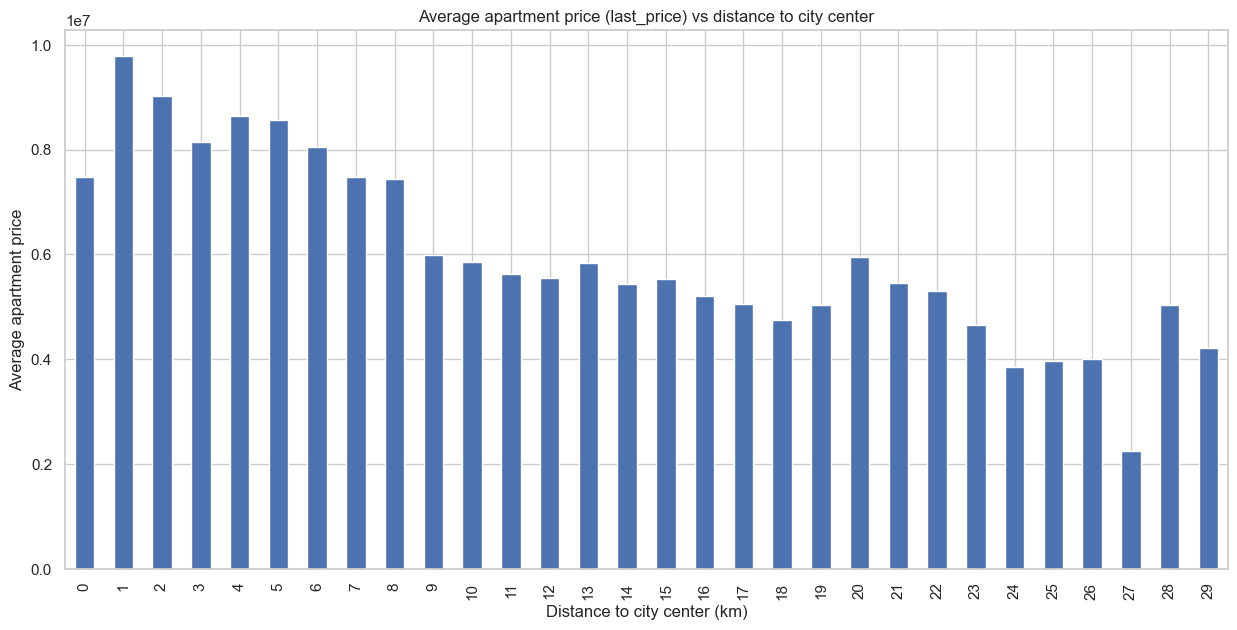

In [48]:
# Selecting apartments in St. Petersburg
df_spb = df[df['locality_name'] == 'Санкт-Петербург'].copy()

# Rounding the distance to the nearest whole kilometer
df_spb.loc[:, 'distance_km'] = df_spb['distance_km'].apply(lambda x: round(x)).astype(int)

# Grouping by distance and calculating mean price
df_dist_price = df_spb.groupby('distance_km')['last_price'].mean()

# Plotting
df_dist_price.plot(kind='bar', figsize=(15, 7))
plt.title('Average apartment price (last_price) vs distance to city center')
plt.xlabel('Distance to city center (km)')
plt.ylabel('Average apartment price')
plt.show()

**Conclusion:**

Overall, the general trend seems to be decrease in the price with increase in the distance from the city center which is expected as urban city centers are usually associated with the highest real estate prices. The few inconsistencies might be due to contributing factors such as right-of-way to scenic points(state parks, water bodies), connections to transport hubs or presence of exclusive suburban neighborhoods etc.

<a id="num6"></a>
## 4. General conclusion 

The dataset with 23699 entries and 22 columns provides key information about real estate listings. Despite missing values in several columns and the existence of anomalous data, necessary preprocessing was carried out to obtain reliable insights.

Our analysis revealed that factors such as the total, living, kitchen area and number of rooms have significant positive correlations with the property price, with total area being the most influential. The year an ad was published and the floor it's on showed negligible impact on the price.

Most properties are around 54.5 square meters, with a majority having around 2 rooms and a ceiling height of 2.75m. Most apartments are not on the first or last floor, averaging around 10 floors per building, with an average distance of 14.7km from the city center.

Typically, ads were posted for a median of 90 days, with slightly longer durations in spring and summer months, and a trend towards faster sales over the years.

Saint Petersburg had the highest number of ads and price per square meter, while Vyborg had the lowest. Property prices generally decrease with an increase in distance from the city center, with few exceptions due to factors like transport connections or proximity to attractive features.

Advice on avoiding abnormal or fraudulent apartment listings: 

* Price Check: An unusually low price could indicate a fraudulent ad. Always compare the property's asking price with the average price in the market.

* Image Verification: Be suspicious of ads with no pictures or only external shots of the building. 

* Too Good to be True: Features like extra-large spaces, luxury amenities at an extremely low price, could be bait used by fraudsters to attract victims.